[[-1.63729806e-02 -5.43163583e-02 -4.26601238e-02 ...  1.30859622e-02
   9.01186278e-02 -8.66834488e-02]
 [-8.28485433e-02 -1.83137296e-02  6.26597006e-02 ...  1.98445968e-02
  -1.21071819e-02  1.05046419e-02]
 [-2.57896122e-02  7.13446267e-02  9.94032630e-01 ... -6.63486272e-04
   4.92842540e-03 -4.66771701e-03]
 ...
 [ 1.75683412e-02  1.60191896e-02 -6.31537516e-04 ...  9.99480570e-01
  -8.61284256e-04  8.49283464e-04]
 [ 8.42096380e-02 -3.40289269e-02  5.02677740e-03 ... -8.23962577e-04
   9.91591343e-01  8.06716125e-03]
 [-8.12817762e-02  3.16246847e-02 -4.76325316e-03 ...  8.13670677e-04
   8.06913254e-03  9.92257361e-01]]
[[ 0.85651642  0.51611977]
 [-0.51611977  0.85651642]]


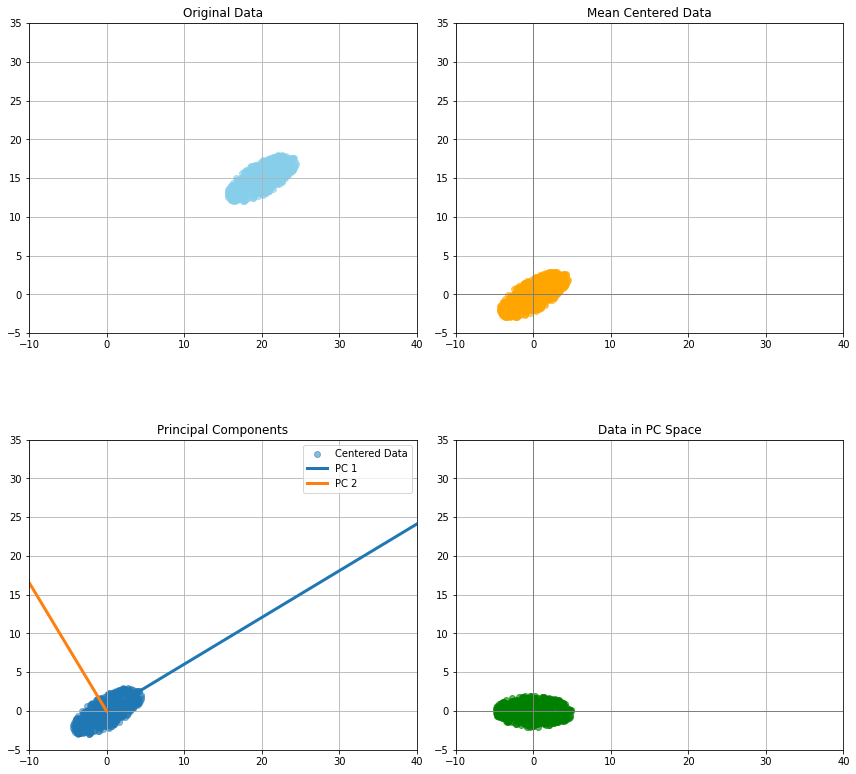

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create filled ellipse points
np.random.seed(42)
n_points = 500

# Ellipse parameters
a = 5  # semi-major axis
b = 2  # semi-minor axis

# Generate random points inside the unit circle
r = np.sqrt(np.random.rand(n_points))
theta = 2 * np.pi * np.random.rand(n_points)
x = a * r * np.cos(theta)
y = b * r * np.sin(theta)
ellipse_points = np.vstack((x, y))  # shape (2, n_points)

# Step 2: Rotate the ellipse
angle_deg = 30
angle_rad = np.radians(angle_deg)
R = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad),  np.cos(angle_rad)]
])
rotated_points = R @ ellipse_points  # shape (2, n_points)

# Step 3: Translate to mean center (20, 15)
offset = np.array([[20], [15]])
translated_points = rotated_points + offset

# Step 4: Transpose for sklearn/SVD convention
X = translated_points.T  # shape (n_points, 2)

# Step 5: Mean center
X_centered = X - X.mean(axis=0)

# Step 6: SVD
U, S, VT = np.linalg.svd(X_centered)
PCs = VT.T  # Principal components (2x2)

# Step 7: Project onto principal components
X_proj = X_centered @ PCs  # new coordinates in PC space

# Set consistent axis limits
xlim = (-10, 40)
ylim = (-5, 35)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# --- Original Data ---
axs[0, 0].scatter(X[:, 0], X[:, 1], alpha=0.6, color='skyblue')
axs[0, 0].set_title('Original Data')
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim(ylim)
axs[0, 0].set_aspect('equal')
axs[0, 0].grid(True)

# --- Mean Centered ---
axs[0, 1].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, color='orange')
axs[0, 1].set_title('Mean Centered Data')
axs[0, 1].axhline(0, color='gray', lw=1)
axs[0, 1].axvline(0, color='gray', lw=1)
axs[0, 1].set_xlim(xlim)
axs[0, 1].set_ylim(ylim)
axs[0, 1].set_aspect('equal')
axs[0, 1].grid(True)

# --- Principal Components ---
axs[1, 0].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='Centered Data')
origin = np.array([0, 0])
for i in range(2):
    vec = PCs[:, i] * S[i]
    axs[1, 0].plot([0, vec[0]], [0, vec[1]], linewidth=3, label=f'PC {i+1}')
axs[1, 0].set_title('Principal Components')
axs[1, 0].set_xlim(xlim)
axs[1, 0].set_ylim(ylim)
axs[1, 0].set_aspect('equal')
axs[1, 0].legend()
axs[1, 0].grid(True)

# --- Projected onto PCs (Un-rotated Ellipse) ---
axs[1, 1].scatter(X_proj[:, 0], X_proj[:, 1], alpha=0.6, color='green')
axs[1, 1].set_title('Data in PC Space')
axs[1, 1].axhline(0, color='gray', lw=1)
axs[1, 1].axvline(0, color='gray', lw=1)
axs[1, 1].set_xlim(xlim)
axs[1, 1].set_ylim(ylim)
axs[1, 1].set_aspect('equal')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

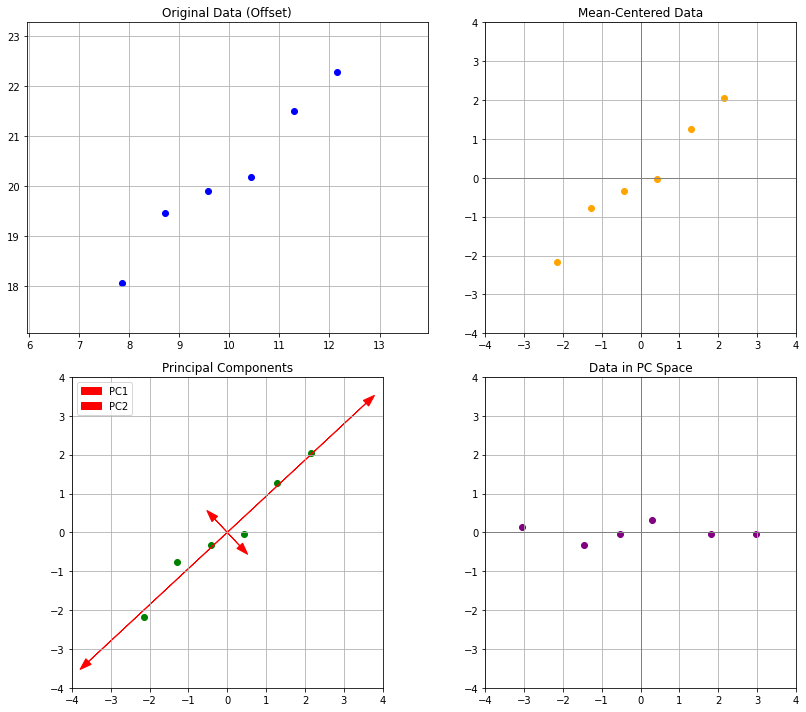

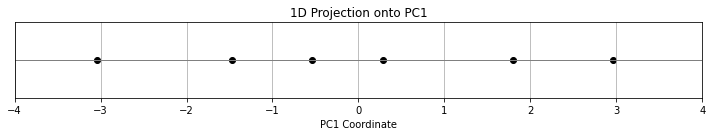

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 6 diagonal-ish points and shift them
X = np.array([
    [ 7.8571 , 18.0558],
    [ 8.7143 , 19.4534],
    [ 9.5714 , 19.8954],
    [10.4286 , 20.1846],
    [11.2857 , 21.4873],
    [12.1429 , 22.2666],
])

# Step 2: Mean center
mu = X.mean(axis=0)
X_centered = X - mu

# Step 3: SVD
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)
PCs = VT.T  # columns = principal directions

# Step 4: Rotate data into PC space
X_proj = X_centered @ PCs

# Step 5: Project onto 1D (PC1 only)
X_proj_1D = X_centered @ PCs[:, :1]  # shape (8, 1)

# Set axis limits (now accounting for shifted data)
combined = np.vstack([X, X_centered + mu, X_proj + mu])
x_min, x_max = combined[:, 0].min() - 1, combined[:, 0].max() + 1
y_min, y_max = combined[:, 1].min() - 1, combined[:, 1].max() + 1
xlim = (x_min, x_max)
ylim = (y_min, y_max)

# --- First figure: 2x2 grid ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Original Data ---
axs[0, 0].scatter(X[:, 0], X[:, 1], color='blue')
axs[0, 0].set_title("Original Data (Offset)")
axs[0, 0].grid(True)
axs[0, 0].set_aspect('equal')
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim(ylim)

# --- Mean Centered ---
axs[0, 1].scatter(X_centered[:, 0], X_centered[:, 1], color='orange')
axs[0, 1].axhline(0, color='gray', lw=1)
axs[0, 1].axvline(0, color='gray', lw=1)
axs[0, 1].set_title("Mean-Centered Data")
axs[0, 1].grid(True)
axs[0, 1].set_aspect('equal')
axs[0, 1].set_xlim(-4, 4)
axs[0, 1].set_ylim(-4, 4)

# --- PCA with both PCs ---
axs[1, 0].scatter(X_centered[:, 0], X_centered[:, 1], color='green')
for i in range(2):
    vec = PCs[:, i] * S[i]
    axs[1, 0].arrow(0, 0, vec[0], vec[1], head_width=0.2, color='red', label=f'PC{i+1}')
    axs[1, 0].arrow(0, 0, -vec[0], -vec[1], head_width=0.2, color='red')
axs[1, 0].set_title("Principal Components")
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_aspect('equal')
axs[1, 0].set_xlim(-4, 4)
axs[1, 0].set_ylim(-4, 4)

# --- Rotated in PC space ---
axs[1, 1].scatter(X_proj[:, 0], X_proj[:, 1], color='purple')
axs[1, 1].axhline(0, color='gray', lw=1)
axs[1, 1].axvline(0, color='gray', lw=1)
axs[1, 1].set_title("Data in PC Space")
axs[1, 1].grid(True)
axs[1, 1].set_aspect('equal')
axs[1, 1].set_xlim(-4, 4)
axs[1, 1].set_ylim(-4, 4)

plt.tight_layout()
plt.show()

# --- Second figure: 1D projection only ---
fig, ax = plt.subplots(figsize=(10, 2))

ax.axhline(0, color='gray', lw=1)
ax.scatter(X_proj_1D[:, 0], np.zeros_like(X_proj_1D), color='black')
ax.set_title("1D Projection onto PC1")
ax.set_yticks([])
ax.set_xlim(-4, 4)
ax.set_xlabel("PC1 Coordinate")
ax.grid(True)

plt.tight_layout()
plt.show()

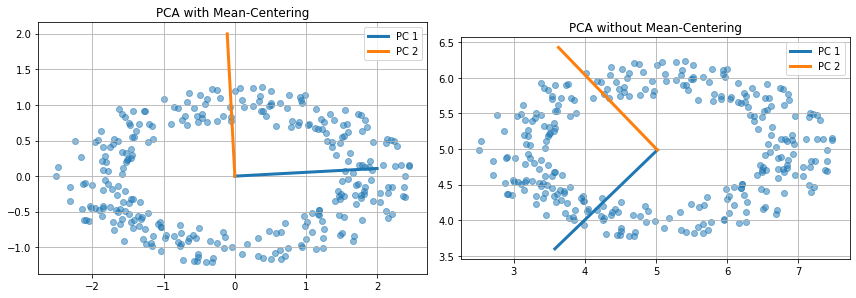

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a basic ellipse
np.random.seed(0)
n = 300
theta = 2 * np.pi * np.random.rand(n)
r = 1.5 + np.random.rand(n)
x = r * np.cos(theta)
y = 0.5 * r * np.sin(theta)
data = np.vstack((x, y)).T  # shape (n, 2)

# Translate the ellipse far from origin to (5, 5)
data_translated = data + np.array([5, 5])

# --- PCA with mean-centering ---
X_centered = data_translated - data_translated.mean(axis=0)
U1, S1, VT1 = np.linalg.svd(X_centered)
PCs_centered = VT1.T

# --- PCA without mean-centering ---
U2, S2, VT2 = np.linalg.svd(data_translated)
PCs_uncentered = VT2.T

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titles = ['PCA with Mean-Centering', 'PCA without Mean-Centering']

for i, (ax, data_plot, PCs, title) in enumerate(zip(
    axs,
    [X_centered, data_translated],
    [PCs_centered, PCs_uncentered],
    titles
)):
    ax.scatter(data_plot[:, 0], data_plot[:, 1], alpha=0.5)
    origin = data_plot.mean(axis=0) if i == 1 else [0, 0]
    
    for j in range(2):
        vec = PCs[:, j] * 2  # scale for visibility
        ax.plot([origin[0], origin[0] + vec[0]], [origin[1], origin[1] + vec[1]],
                linewidth=3, label=f'PC {j+1}')
    
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()